# Ejemplos

Archivos excel con series de tiempo de ejemplo scrapeados con XlSeries para el taller realizado en CONDATOS 2015 en Santiago de Chile.

In [1]:
from xlseries import XlSeries
import os

In [2]:
DIR_EJEMPLOS = "1-ejemplos"

#### 1 (Chile - INE): ÍNDICE DE PRECIOS AL CONSUMIDOR (IPC) - COBERTURA NACIONAL - BASE AÑO 2009 - HOJA DE CIFRA GENERALES

In [3]:
xl1 = XlSeries(os.path.join(DIR_EJEMPLOS, "ipc_general_referencial_diciembre2013.xlsx"))

In [4]:
params1 = {
    "headers_coord": "D5-G5",
    "frequency": "M",
    "time_header_coord": ["B5", "C5"],
    "data_starts": 6
}

In [5]:
df1 = xl1.get_data_frames(params1)

In [6]:
df1.tail()

,Indice,Variacion Mensual,Variacion Acumulada,Variacion a 12 Meses
2013-08,110.06,0.2,1.3,2.2
2013-09,110.65,0.5,1.9,2.0
2013-10,110.80,0.1,2.0,1.5
2013-11,111.22,0.4,2.4,2.4
2013-12,111.88,0.6,3.0,3.0


#### 2 (Chile - INE): INDICE GENERAL DE REMUNERACIONES Y DE COSTO DE LA MANO DE OBRA POR HORA - (Base Enero 2006=100)

In [7]:
xl2 = XlSeries(os.path.join(DIR_EJEMPLOS, "serie12101.xls"))

In [8]:
params2 = {
    "headers_coord": "C5-J6",
    "frequency": "M",
    "time_header_coord": "A5-B5",
    "data_starts": 8,
    "context": {
        "Indice Nominal de Remuneraciones": "C4-F4",
        "Indice Nominal de Costo Mano de Obra": "G4-J4",
        "Variacion": ["D5-F5", "H5-J5"]
    }
}

In [9]:
df2 = xl2.get_data_frames(params2)

In [10]:
df2.tail()

,Indice Nominal de Remuneraciones - Indice,Indice Nominal de Remuneraciones - Variacion - Variacion,Indice Nominal de Costo Mano de Obra - Indice,Indice Nominal de Costo Mano de Obra - Variacion - Variacion,Indice Nominal de Remuneraciones - Variacion - Mes Anterior,Indice Nominal de Remuneraciones - Variacion - Respecto Diciembre,Indice Nominal de Remuneraciones - Variacion - En 12 Meses,Indice Nominal de Costo Mano de Obra - Variacion - Mes Anterior,Indice Nominal de Costo Mano de Obra - Variacion - Respecto Diciembre,Indice Nominal de Costo Mano de Obra - Variacion - En 12 Meses
2009-08,127.17,0.4,123.99,0.4,0.4,2.8,5.9,0.4,3.0,6.7
2009-09,127.85,0.5,124.70,0.6,0.5,3.3,5.7,0.6,3.6,6.5
2009-10,128.12,0.2,124.98,0.2,0.2,3.5,5.5,0.2,3.8,6.2
2009-11,128.51,0.3,125.32,0.3,0.3,3.9,5.4,0.3,4.1,6.0
2009-12,129.88,1.1,126.80,1.2,1.1,5.0,5.0,1.2,5.3,5.3


#### 3 (Chile - INE): POBLACIÓN, PAÍS Y REGIONES: ACTUALIZACIÓN POBLACIÓN 2002-2012 Y PROYECCIONES 2013-2020

In [11]:
xl3 = XlSeries(os.path.join(DIR_EJEMPLOS, "proyecciones-de-poblacion-2014.xlsx"))

In [12]:
params3_ambos_sexos = {
    "headers_coord": "A6-A87",
    "frequency": "Y",
    "time_header_coord": "A5",
    "data_starts": 2
}

params3_hombres = params3_ambos_sexos.copy()
params3_hombres["headers_coord"] = "A92-A173"
params3_hombres["time_header_coord"] = "A91"

params3_mujeres = params3_ambos_sexos.copy()
params3_mujeres["headers_coord"] = "A178-A259"
params3_mujeres["time_header_coord"] = "A177"

In [13]:
ws_name = "País"

In [14]:
df3_ambos_sexos = xl3.get_data_frames(params3_ambos_sexos, ws_name)
df3_hombres = xl3.get_data_frames(params3_hombres, ws_name)
df3_mujeres = xl3.get_data_frames(params3_mujeres, ws_name)

In [15]:
df3_ambos_sexos.tail()

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80 o mas,Total
2016,249221,247411,245296,246480,250650,253299,251535,245995,239252,234905,...,101888,95151,88365,81972,75978,70607,65681,60933,400616,18191884
2017,249979,249731,247943,245836,246986,251119,253768,252012,246464,239677,...,106098,99430,92549,85691,79252,73180,67778,62880,417001,18373917
2018,249181,250496,250264,248486,246341,247458,251591,254245,252484,246886,...,109790,103550,96724,89764,82860,76336,70258,64891,433871,18552218
2019,248189,249694,251033,250808,248994,246809,247935,252069,254713,252911,...,113307,107172,100748,93829,86804,79820,73301,67275,451266,18726548
2020,246996,248709,250230,251583,251312,249467,247285,248415,252542,255140,...,116985,110623,104284,97746,90743,83632,76656,70202,469536,18896684


In [16]:
df3_hombres.tail()

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80 o mas,Total
2016,126836,125910,124822,125705,127833,128955,128179,125450,122021,120094,...,46090,42614,39186,35925,32831,30045,27480,25015,140728,9003254
2017,127221,127090,126173,125086,125949,128057,129179,128409,125674,122230,...,48115,44669,41137,37669,34390,31280,28503,25976,147355,9092950
2018,126821,127476,127355,126439,125330,126174,128284,129408,128635,125881,...,49927,46643,43132,39556,36068,32770,29684,26948,154401,9180864
2019,126322,127077,127740,127621,126684,125554,126405,128512,129633,128843,...,51676,48413,45048,41488,37881,34377,31108,28074,161843,9266854
2020,125718,126582,127342,128009,127865,126912,125781,126637,128738,129842,...,53573,50123,46768,43340,39740,36116,32641,29432,169800,9350786


In [17]:
df3_mujeres.tail()

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80 o mas,Total
2016,122385,121501,120474,120775,122817,124344,123356,120545,117231,114811,...,55798,52537,49179,46047,43147,40562,38201,35918,259888,9188630
2017,122758,122641,121770,120750,121037,123062,124589,123603,120790,117447,...,57983,54761,51412,48022,44862,41900,39275,36904,269646,9280967
2018,122360,123020,122909,122047,121011,121284,123307,124837,123849,121005,...,59863,56907,53592,50208,46792,43566,40574,37943,279470,9371354
2019,121867,122617,123293,123187,122310,121255,121530,123557,125080,124068,...,61631,58759,55700,52341,48923,45443,42193,39201,289423,9459694
2020,121278,122127,122888,123574,123447,122555,121504,121778,123804,125298,...,63412,60500,57516,54406,51003,47516,44015,40770,299736,9545898


In [18]:
# importamos librerías necesarias para graficar
%matplotlib inline
import matplotlib

# seteamos un estilo visual para los gráficos
matplotlib.style.use('ggplot')

In [19]:
import pandas as pd

In [20]:
data = {"Ambos": df3_ambos_sexos["Total"], 
        "Hombres": df3_hombres["Total"], 
        "Mujeres": df3_mujeres["Total"]}
df3 = pd.DataFrame(data=data)

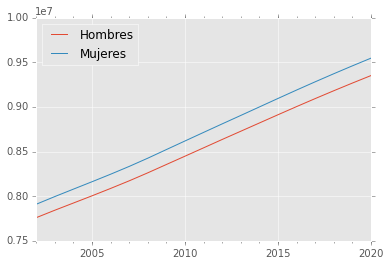

In [21]:
df3[["Hombres", "Mujeres"]].plot()

In [22]:
# .iloc se utiliza para seleccionar las filas que queremos ver
df3.iloc[-6:]  

,Ambos,Hombres,Mujeres
2015,18006407,8911940,9094467
2016,18191884,9003254,9188630
2017,18373917,9092950,9280967
2018,18552218,9180864,9371354
2019,18726548,9266854,9459694
2020,18896684,9350786,9545898


#### 4 (Chile - BCC): Balanza de Pagos de Chile

In [23]:
xl4 = XlSeries(os.path.join(DIR_EJEMPLOS, "Balanza_de_Pagos.xls"))

In [24]:
params4 = {
    "headers_coord": ["A9_B9", "A9", "A34-A38", "A67",
                      "C11", "C18", "C29", "E40", "E49", "E52-E53",
                      "E59", "E65", "E12", "E15", "E19", "F20-F31",
                      "G13-G28", "G41-G54", "H42-H64"],
    "frequency": "QQQQY",
    "time_header_coord": ["H5", "H7"],
    "data_starts": 9,
    "context": {
        "I. Cuenta corriente": "A10-A31",
        "A. Bienes y servicios": "C12-C17",
        "Bienes": "E13-E14",
        "Servicios": "E16-E17",
        "B. Renta (Ingreso primario)": "C19-C28",
        "Renta de la inversión": "E20-E28",
        "C.  Transferencias corrientes (Ingreso secundario)": "C30-C31",
        "IV. Cuenta financiera (2)": "A39-A65",
        "A.  Inversión directa": "E41-E48",
        "Activos": ["G42-G44", "G55-G58"],
        "Pasivos": ["G46-G48", "G60-G64"],
        "B. Inversión de cartera": "E50-E51",
        "D. Otra inversión": "E54-E64"
    },
}

In [25]:
df4 = xl4.get_data_frames(params4)

In [26]:
print "Ahora hay", len(df4), "dataframes."

Ahora hay 2 dataframes.


In [27]:
print "Uno trimestral..."
df4[0].tail()

Uno trimestral...


,I. Cuenta corriente,I.,II. Cuenta de capital,III. Capacidad/Necesidad de financiamiento (1),IV. Cuenta financiera (2),V.,I. Cuenta corriente - A. Bienes y servicios,I. Cuenta corriente - B. Renta ( Ingreso primario),I. Cuenta corriente - C. Transferencias corrientes (Ingreso secundario),IV. Cuenta financiera (2) - A. Inversion directa,...,IV. Cuenta financiera (2) - A. Inversión directa - Pasivos - Instrumentos de deuda,IV. Cuenta financiera (2) - D. Otra inversión - Activos - Creditos comerciales,IV. Cuenta financiera (2) - D. Otra inversión - Activos - Prestamos,IV. Cuenta financiera (2) - D. Otra inversión - Activos - Moneda y depositos,IV. Cuenta financiera (2) - D. Otra inversión - Activos - Otros activos,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Creditos comerciales,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Prestamos,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Monedas y depositos,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Otros pasivos,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Asignaciones DEG
2014Q2,-251.052853,-251.052853,2.046057,-249.006796,43.967518,292.974315,1898.408460,-2699.317654,549.856341,-625.247456,...,1192.528428,-390.305256,251.324254,-556.552952,0,-616.388514,-100.157816,116.751437,0.405742,-0.039050
2014Q3,-1584.242533,-1584.242533,2.557425,-1581.685108,-2371.525134,-789.840026,32.350798,-2144.325933,527.732602,-2506.903070,...,1040.099725,-1130.821239,-100.196084,686.583456,0,-273.897500,-1876.818568,-154.417926,-2.383181,-0.084792
2014Q4,-704.809399,-704.809399,2.799991,-702.009408,-1088.332982,-386.323575,672.626967,-1666.362791,288.926424,-5967.776110,...,4162.353267,972.735037,596.879652,2912.741169,0,238.630559,-434.233193,78.806499,11.558315,-0.023010
2015Q1,1220.564403,1220.564403,66.154230,1286.718633,2155.013909,868.295276,1847.492343,-1080.013037,453.085097,1703.633895,...,955.402852,-976.716487,-101.480095,-2219.547975,0,-767.428844,-1973.171691,223.918660,-12.909924,-0.008017
2015Q2,761.060663,761.060663,1.357089,762.417752,-595.208265,-1357.626017,1801.818552,-1434.955046,394.197157,-1542.958539,...,1142.430090,-437.045333,-181.866624,773.071775,0,-386.881971,-550.671673,139.152976,-0.573717,0.004924


In [28]:
print "...y uno anual!"
df4[1].tail()

...y uno anual!


,I. Cuenta corriente,I.,II. Cuenta de capital,III. Capacidad/Necesidad de financiamiento (1),IV. Cuenta financiera (2),V.,I. Cuenta corriente - A. Bienes y servicios,I. Cuenta corriente - B. Renta ( Ingreso primario),I. Cuenta corriente - C. Transferencias corrientes (Ingreso secundario),IV. Cuenta financiera (2) - A. Inversion directa,...,IV. Cuenta financiera (2) - A. Inversión directa - Pasivos - Instrumentos de deuda,IV. Cuenta financiera (2) - D. Otra inversión - Activos - Creditos comerciales,IV. Cuenta financiera (2) - D. Otra inversión - Activos - Prestamos,IV. Cuenta financiera (2) - D. Otra inversión - Activos - Moneda y depositos,IV. Cuenta financiera (2) - D. Otra inversión - Activos - Otros activos,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Creditos comerciales,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Prestamos,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Monedas y depositos,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Otros pasivos,IV. Cuenta financiera (2) - D. Otra inversión - Pasivos - Asignaciones DEG
2010,3769.145711,3769.145711,6240.472370,10009.618082,8966.651757,-1042.966325,14044.511329,-14685.755912,4410.390294,-6048.852877,...,2984.610896,2415.724712,592.516411,-111.496070,3487.000000,1701.148759,-272.604089,320.000000,-2.400000,0.236200
2011,-3087.887039,-3087.887039,11.902515,-3075.984524,-3637.832550,-561.848026,7967.007774,-13919.734818,2864.840005,-3057.099006,...,3161.679915,1175.064163,262.554914,-415.630083,-1684.000000,1582.661148,3566.434731,-117.500000,11.900000,-0.200000
2012,-9624.397580,-9624.397580,11.731837,-9612.665743,-9321.204993,291.460750,-410.908340,-11273.623626,2060.134387,-7901.680314,...,10840.549358,-308.420484,62.600039,-846.124627,-1242.269788,-316.261355,2363.754879,618.216751,13.622143,-0.068580
2013,-10125.042079,-10125.042079,11.400000,-10113.642079,-11251.546131,-1137.904052,-1582.054537,-10730.386527,2187.398985,-8955.646050,...,8328.846083,-811.531114,53.129943,476.690035,-539.149502,-639.066433,-1726.759596,-64.601169,-18.798205,-0.000001
2014,-2995.465054,-2995.465054,10.235479,-2985.229575,-2726.268083,258.961493,4010.421787,-8857.254062,1851.367221,-9950.175145,...,7248.025194,125.291567,130.820949,4122.811559,0.000000,-1512.497964,-2260.995208,-104.125379,4.706052,-0.113907


In [29]:
bp_trimestral = df4[0]

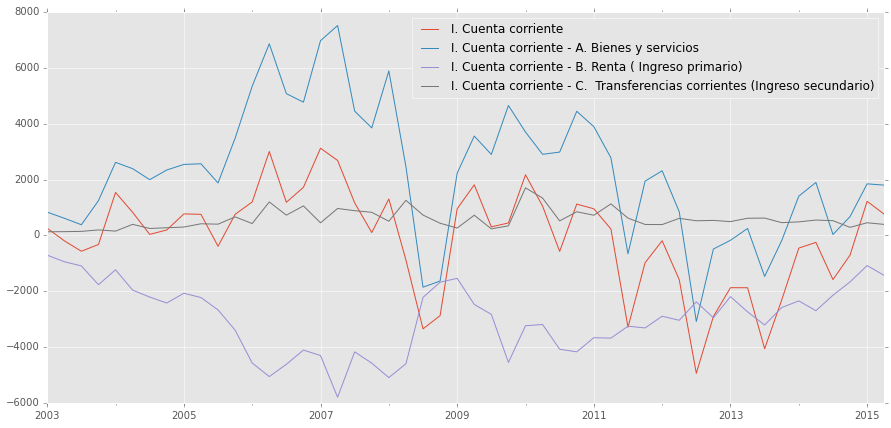

In [30]:
bp_trimestral[["I. Cuenta corriente", 
               "I. Cuenta corriente - A. Bienes y servicios", 
               "I. Cuenta corriente - B. Renta ( Ingreso primario)", 
               "I. Cuenta corriente - C.  Transferencias corrientes (Ingreso secundario)"]].plot(figsize=(15, 7))

#### 5 (Argentina - BCRA): Tipo de cambio Argentina (test case 2)

El excel del cual fue tomado este caso de testeo ya no se publica como tal, en su lugar hay una aplicación web que muestra el resultado en html.

In [31]:
# se puede acceder a los casos de testeo con los métodos en path_finders
from xlseries.utils.path_finders import get_orig_cases_path

In [32]:
xl5 = XlSeries(get_orig_cases_path(2))

In [33]:
params5_D = {'data_starts': 5,
             'frequency': "D",
             'headers_coord': 'D4',
             'missing_value': 'Implicit',
             'time_header_coord': 'C4'
            }

params5_M = {'data_starts': 22,
             'frequency': 'M',
             'headers_coord': 'F4',
             'time_alignment': -1,
             'time_header_coord': 'F4'
            }

In [34]:
df5_D = xl5.get_data_frames(params5_D)
df5_M = xl5.get_data_frames(params5_M)

In [35]:
df5_D.tail()

,Tipo de Cambio de Referencia - en Pesos - por Dolar
2014-04-06,NaN
2014-04-07,8.0018
2014-04-08,8.0013
2014-04-09,8.0008
2014-04-10,8.0012


In [36]:
df5_M.tail()

,Tipo de Cambio Nominal Promedio Mensual
2013-11,6.014937
2013-12,6.319179
2014-01,7.096727
2014-02,7.856530
2014-03,7.931300
